In [1]:
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def load_embeddings(fname):   
    file_path = os.path.join(os.getcwd(), 'wiki/%s.emb' % (fname))
    
    embeddings = {}
    with open(file_path) as file:
        for line in file:
            line = line.strip().split()
            if int(line[0]) >= 100:
                continue
            embeddings[int(line[0])] = np.array(line[1:]).astype(float)

    return embeddings

label_embeddings = load_embeddings('link_edges')

In [4]:
label_embeddings.__class__

dict

In [7]:
list(label_embeddings.items())[0:1]

[(78, array([ 1.34968e+00, -2.02878e+00,  6.38512e-02,  8.50573e-01,
         -1.68948e+00,  5.97766e-02, -3.55886e-01,  1.12431e+00,
          9.07972e-01, -1.84144e-02, -5.47836e-01, -3.56334e-02,
          5.88858e-01,  6.02105e-01, -5.49356e-01,  1.10482e+00,
         -9.97546e-01, -1.27713e-01, -1.07877e-01,  4.13097e-01,
         -1.29348e+00,  1.88687e-01,  9.03298e-01, -3.61067e-01,
          3.25926e-01, -1.70512e-01, -2.15499e-01,  6.35694e-01,
         -4.34850e-02, -1.91105e-02, -7.02124e-01, -1.43362e-01,
         -5.05997e-01, -7.45412e-02,  3.20215e-01,  3.23739e-01,
          2.47753e-01,  2.22469e-01,  3.39322e-01, -6.52166e-02,
         -1.10864e-01, -4.16758e-02, -1.53776e-01, -1.18485e-02,
          2.00408e-01, -2.53434e-01, -1.49199e-01,  8.26250e-02,
          1.49735e-01,  3.66212e-02,  1.67517e-01, -3.10118e-01,
         -2.32814e-01,  1.40992e-01, -4.89413e-02, -6.44587e-02,
         -2.37489e-01,  9.65620e-02, -1.80366e-01,  2.95113e-02,
         -1.85130e-01

In [8]:
cat_dict = pickle.load(open(os.path.join(os.getcwd(), 'wiki/link_edges_dict_cat.pkl'), "rb"))
graph_to_cifar_dict = pickle.load(open(os.path.join(os.getcwd(), 'wiki/graph_to_cifar_labels.pkl'), "rb"))

data_dir = os.path.join(os.getcwd(), 'Data/cifar-100-python/')
meta = pickle.load(open(os.path.join(data_dir, 'meta'), "rb"), encoding='latin1')
fine_label_names = meta['fine_label_names']

#Loading data and embeddings
embedding_len = len(label_embeddings[0])

label_embeddings_arr = np.zeros((100, embedding_len))
for i in range(100):
    label_embeddings_arr[i] = label_embeddings[i]

In [14]:
print(label_embeddings_arr.__class__)
print(label_embeddings_arr.shape)
print(fine_label_names.__class__)
print(len(fine_label_names))

<class 'numpy.ndarray'>
(100, 128)
<class 'list'>
100


In [15]:
labels = fine_label_names
X = label_embeddings_arr
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
pca_embeddings = {}
for i, label in enumerate(labels):
    pca_embeddings[label] = X_r[i, :]
print(pca.explained_variance_)

[0.34326538 0.14231831]


In [17]:
print(fine_label_names)

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

In [18]:
superclasses = {
    "aquatic mammals":["beaver", "dolphin", "otter", "seal", "whale"],
    "fish": ["aquarium_fish", "flatfish", "ray", "shark", "trout"],
    "flowers": ["orchid", "poppy", "rose", "sunflower", "tulip"],
    "food containers": ["bottle", "bowl", "can", "cup", "plate"],
    "fruit and vegetables": ["apple", "mushroom", "orange", "pear", "sweet_pepper"],
    "household electrical devices": ["clock", "keyboard", "lamp", "telephone", "television"],
    "household furniture": ["bed", "chair", "couch", "table", "wardrobe"],
    "insects": ["bee", "beetle", "butterfly", "caterpillar", "cockroach"],
    "large carnivores": ["bear", "leopard", "lion", "tiger", "wolf"],
    "large man-made outdoor things": ["bridge", "castle", "house", "road", "skyscraper"],
    "large natural outdoor scenes": ["cloud", "forest", "mountain", "plain", "sea"],
    "large omnivores and herbivores": ["camel", "cattle", "chimpanzee", "elephant", "kangaroo"],
    "medium-sized mammals": ["fox", "porcupine", "possum", "raccoon", "skunk"],
    "non-insect invertebrates": ["crab", "lobster", "snail", "spider", "worm"],
    "people": ["baby", "boy", "girl", "man", "woman"],
    "reptiles": ["crocodile", "dinosaur", "lizard", "snake", "turtle"],
    "small mammals": ["hamster", "mouse", "rabbit", "shrew", "squirrel"],
    "trees": ["maple_tree", "oak_tree", "palm_tree", "pine_tree", "willow_tree"],
    "vehicles 1": ["bicycle", "bus", "motorcycle", "pickup_truck", "train"],
    "vehicles 2": ["lawn_mower", "rocket", "streetcar", "tank", "tractor"]
}
super_class_labels = []
sc_data = {}
for superclass in superclasses.keys():
    sc_data[superclass] = []
    for label in superclasses[superclass]:
        sc_data[superclass].append(pca_embeddings[label])

In [19]:
to_include = [
         #'aquatic mammals', 
           #'fish', 
           #'flowers', 
           'food containers', 
           #'fruit and vegetables', 
           #'household electrical devices', 
           #'household furniture', 
           #'insects', 
           'large carnivores', 
           #'large man-made outdoor things', 
           #'large natural outdoor scenes', 
           #'large omnivores and herbivores', 
           'medium-sized mammals', 
           #'non-insect invertebrates', 
           #'people', 
           'reptiles', 
           'small mammals', 
           'trees', 
           'vehicles 1', 
           'vehicles 2'
          ]

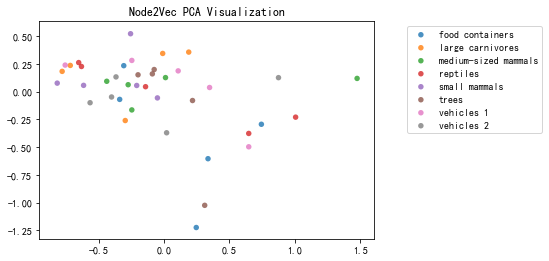

In [20]:
#print(sc_data)
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
for sc in sc_data:
    if not sc in to_include:
        continue
    sc_data[sc] = np.array(sc_data[sc])
    x = sc_data[sc][:, 0]
    y = sc_data[sc][:, 1]
    ax.scatter(x, y, alpha=0.8, edgecolors='none', s=30, label=sc)
 
plt.title('Node2Vec PCA Visualization')
plt.legend(loc=9, bbox_to_anchor=(1.3, 1.0))
plt.show()

In [21]:
print(sc_data.keys())

dict_keys(['aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 'household electrical devices', 'household furniture', 'insects', 'large carnivores', 'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores', 'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees', 'vehicles 1', 'vehicles 2'])
